In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [3]:
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='Class', ylabel='count'>

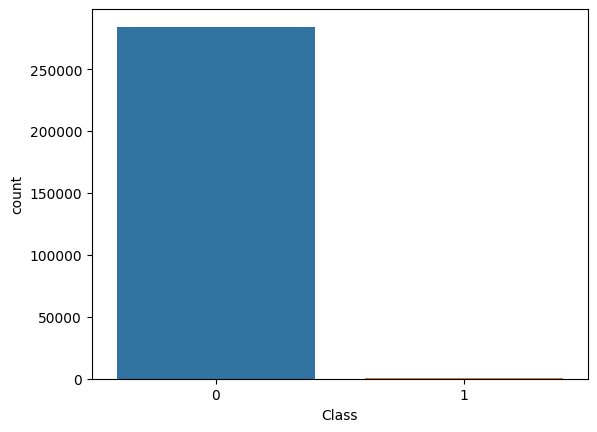

In [8]:
sns.countplot(df,x='Class')

In [9]:
fraud=df[df['Class']==1]
normal=df[df['Class']==0]
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [10]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [13]:
normal_sample=normal.sample(n=492)

In [14]:
new_df=pd.concat([normal_sample,fraud],axis=0)

In [15]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
151363,95454.0,2.009094,-0.203256,-1.056784,0.288158,0.095783,-0.273681,-0.213559,-0.143488,2.130397,...,-0.018636,0.452527,0.069109,0.769516,0.166045,0.099020,-0.061097,-0.070583,8.20,0
276531,167152.0,-0.235495,1.396723,-0.410002,0.903840,0.984535,-0.183396,0.557935,-0.079667,-1.030019,...,0.249201,0.922631,-0.380687,0.286261,-0.207764,1.054081,-0.266170,-0.099970,0.79,0
275184,166411.0,1.994744,-0.845981,0.227189,-0.657497,-1.426838,-0.402638,-1.272483,0.155472,2.118702,...,0.214733,0.799017,0.331883,1.199907,-0.602637,0.623402,-0.004704,-0.029804,1.00,0
179190,123961.0,1.837737,-1.467830,-0.886455,-1.036721,-0.343144,1.307708,-1.090705,0.459103,-0.012614,...,-0.066016,-0.281126,0.337620,-1.673722,-0.691881,-0.469757,0.032592,-0.053970,110.00,0
147784,88986.0,-0.153865,1.032096,-0.466634,-0.672697,0.787838,-0.563113,0.738283,0.145134,0.090606,...,-0.324793,-0.815421,0.125274,0.559535,-0.480343,0.102004,0.323840,0.129615,3.57,0


In [16]:
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [17]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97277.558943,-0.002293,-0.084664,0.018936,-0.000562,-0.016648,-0.028729,0.008391,0.101871,0.001634,...,0.022377,-0.003563,-0.009939,-0.008865,-0.006959,-0.029284,0.006668,-0.005002,0.000470,99.791280
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [18]:
x=new_df.drop(['Class'],axis=1)
y=new_df['Class']

In [30]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [21]:
print(x.shape,x_train.shape,x_test.shape)

(984, 30) (787, 30) (197, 30)


In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score

In [23]:
model=XGBClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)

# Save the trained model using joblib
import joblib

model_filename = 'xgb_fraud_model.pkl'
joblib.dump(model, model_filename)
print(f"Model successfully saved as {model_filename}")

Model successfully saved as xgb_fraud_model.pkl


In [24]:
y_pred_prob=model.predict_proba(x_test)[:,1]

In [25]:
y_pred_prob

array([9.9953616e-01, 4.9585830e-02, 2.9493798e-02, 4.7755758e-03,
       9.9989259e-01, 8.0900086e-04, 9.9174505e-01, 9.9984181e-01,
       1.1391753e-02, 9.9971920e-01, 9.4654923e-03, 9.9973041e-01,
       9.9972612e-01, 1.7543696e-03, 5.3283651e-03, 9.9985957e-01,
       2.3011675e-03, 9.8285520e-01, 8.4624754e-04, 3.7051276e-03,
       1.8650948e-03, 2.7109280e-03, 2.0638567e-04, 9.9992180e-01,
       2.8364555e-04, 9.9989760e-01, 9.9986637e-01, 1.8136326e-04,
       9.9988198e-01, 1.5100694e-02, 9.1881591e-01, 9.9971992e-01,
       5.1084217e-03, 9.9719977e-01, 9.9988449e-01, 2.1934195e-01,
       9.9161640e-04, 2.3402525e-01, 1.5582686e-04, 9.9980026e-01,
       9.9774170e-01, 2.1562248e-04, 8.6094505e-01, 9.9991858e-01,
       9.9960726e-01, 9.9987340e-01, 9.9989331e-01, 9.9978799e-01,
       5.4596448e-03, 1.3914618e-01, 1.9660681e-03, 3.5990104e-03,
       2.9857355e-04, 1.2554587e-02, 1.1414969e-02, 1.2426975e-02,
       1.2654299e-02, 9.9991536e-01, 3.0504311e-03, 5.1540798e

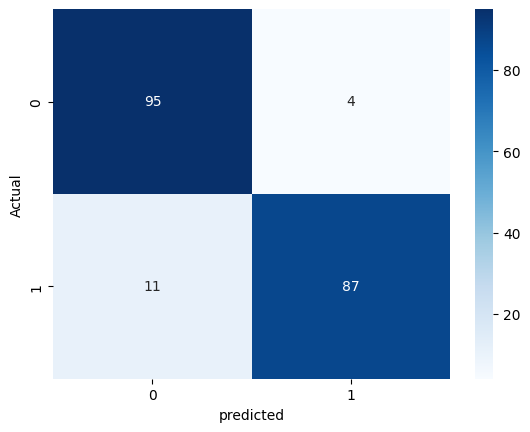

In [26]:
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()
           

In [27]:
auc_pr = average_precision_score(y_test, y_pred_prob)
print(f"Area Under the Precision-Recall Curve: {auc_pr:.4f}")

Area Under the Precision-Recall Curve: 0.9804


In [28]:
# Load the saved model for predictions
import joblib

loaded_model = joblib.load('xgb_fraud_model.pkl')
print("Model loaded successfully!")
# Now use loaded_model.predict(new_data) as needed

Model loaded successfully!
